In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json

folder = "drums"
res = 100

In [13]:
f = open(folder + "/transforms_train.json",)
j = json.load(f)
f.close()

count = len(j["frames"])

images = np.zeros((count, res, res, 3))
poses = np.zeros((count, 4, 4))

print(count)

100


In [14]:
for i in range(count):
    img = cv2.imread(folder + "/train/r_" + str(i) + ".png")
    img = cv2.resize(img, dsize=(res, res))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    images[i] = img / 256
    poses[i] = np.array(j["frames"][i]["transform_matrix"])

np.savez_compressed(folder+".npz", images=images.astype("float32"), poses=poses.astype("float32"), focal=130)

(100, 100, 100, 3) (100, 4, 4)


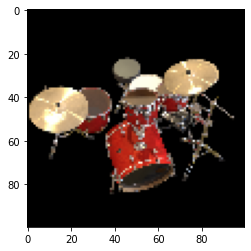

In [15]:
print(images.shape, poses.shape)

testimg, testpose = images[-1], poses[-1]
images = images[:-1,...,:3]
poses = poses[:-1]

plt.imshow(testimg)
plt.show()